In [1]:
import requests
from bs4 import BeautifulSoup

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.detik.com/tag/cpns-2025"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

news_items = soup.find_all('article')


data = []
for item in news_items:
    title = item.find('h2', class_='title')
    if title: # judul
        title_text = title.text.strip()  # teks judul
        link = item.find('a')['href']  # link dari tag <a>
        data.append({'Judul': title_text, 'Link': link})

df = pd.DataFrame(data)
print(df)

                                               Judul  \
0  Kapan Pendaftaran CPNS 2025 Dibuka? Simak Info...   
1  Prediksi Formasi CPNS 2025 Buat Lulusan SMA, L...   
2  Seleksi CPNS 2025 Siap Dibuka, Ini Perkiraan J...   
3  Informasi CPNS 2025: Jadwal Pendaftaran, Forma...   
4  Pendaftaran CPNS 2025: Jadwal, Syarat, hingga ...   
5  Info Lengkap CPNS 2025, Kapan Pendaftaran Dibuka?   
6  Kapan Pendaftaran CPNS 2025 Dibuka? Ini Update...   
7  Sederet Instansi Umumkan Hasil Seleksi CPNS 20...   
8  Cara Download Sertifikat SKD untuk CPNS 2025, ...   
9  Kementerian Era Prabowo Tambah Banyak, Tahun D...   

                                                Link  
0  https://www.detik.com/edu/detikpedia/d-7808927...  
1  https://www.detik.com/edu/detikpedia/d-7758825...  
2  https://www.detik.com/edu/detikpedia/d-7745862...  
3  https://www.detik.com/jateng/bisnis/d-7742332/...  
4  https://www.detik.com/sulsel/berita/d-7733994/...  
5  https://www.detik.com/jatim/berita/d-7733496/i... 

In [13]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positif'
    elif analysis.sentiment.polarity < 0:
        return 'Negatif'
    else:
        return 'Netral'

df['Sentimen'] = df['Judul'].apply(analyze_sentiment)

print(df)

                                               Judul  \
0  Kapan Pendaftaran CPNS 2025 Dibuka? Simak Info...   
1  Prediksi Formasi CPNS 2025 Buat Lulusan SMA, L...   
2  Seleksi CPNS 2025 Siap Dibuka, Ini Perkiraan J...   
3  Informasi CPNS 2025: Jadwal Pendaftaran, Forma...   
4  Pendaftaran CPNS 2025: Jadwal, Syarat, hingga ...   
5  Info Lengkap CPNS 2025, Kapan Pendaftaran Dibuka?   
6  Kapan Pendaftaran CPNS 2025 Dibuka? Ini Update...   
7  Sederet Instansi Umumkan Hasil Seleksi CPNS 20...   
8  Cara Download Sertifikat SKD untuk CPNS 2025, ...   
9  Kementerian Era Prabowo Tambah Banyak, Tahun D...   

                                                Link Sentimen  
0  https://www.detik.com/edu/detikpedia/d-7808927...   Netral  
1  https://www.detik.com/edu/detikpedia/d-7758825...   Netral  
2  https://www.detik.com/edu/detikpedia/d-7745862...   Netral  
3  https://www.detik.com/jateng/bisnis/d-7742332/...   Netral  
4  https://www.detik.com/sulsel/berita/d-7733994/...   Netral  

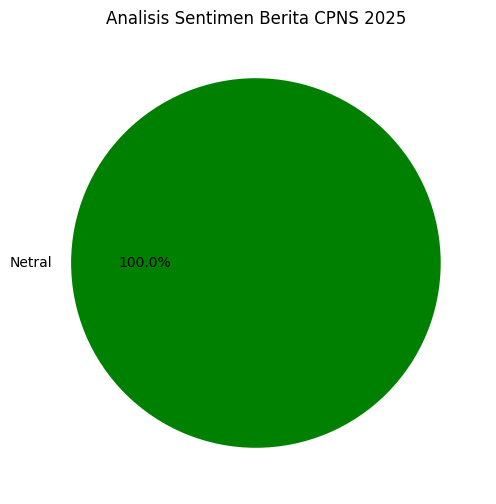

In [14]:
import matplotlib.pyplot as plt

sentimen_count = df['Sentimen'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentimen_count, labels=sentimen_count.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Analisis Sentimen Berita CPNS 2025')
plt.show()